# COVID 19 DETECTION USING CNN

## Importing required modules

In [4]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D,Flatten,Dropout
from keras.applications import MobileNet
# from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from google.colab import files

## Importing the pretrained imagenet model and adding extra dense layers

In [21]:

base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dropout(0.5)(x) #dropout layer 1
x=Dense(1024,activation='relu')(x) #dense layer 3
x=Dropout(0.5)(x) #dropout layer 1
x=Dense(1024,activation='relu')(x)
x=Dense(512,activation='relu')(x) #dense layer 4
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation

## Freezing weights of the first 20 layers

In [22]:

model=Model(inputs=base_model.input,outputs=preds)

for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]: 
    layer.trainable=True

## Transfer Learning
### [Link to final Dataset](https://drive.google.com/drive/folders/1NjWDqwSWbDDnTPasxlFjPuKp0zeolL-S?usp=sharing)

In [23]:
# train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

train_generator=train_datagen.flow_from_directory('/content/DATASET/train/',
                                                  target_size=(224,224),
                                                  color_mode='rgb',
                                                  batch_size=32,
                                                  class_mode='categorical', shuffle=True)

test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

test_generator=train_datagen.flow_from_directory('/content/DATASET/test/',
                                                  target_size=(224,224),
                                                  color_mode='rgb',
                                                  batch_size=32,
                                                  class_mode='categorical', shuffle=True)


model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizerf
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
history = model.fit_generator(generator=train_generator,
                    validation_data = test_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

Found 3810 images belonging to 2 classes.
Found 656 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
119/119 [==============================] - 121s 992ms/step - loss: 0.3615 - accuracy: 0.8930 - val_loss: 0.5811 - val_accuracy: 0.8537
Epoch 2/10
119/119 [==============================] - 115s 968ms/step - loss: 0.0724 - accuracy: 0.9792 - val_loss: 0.0336 - val_accuracy: 0.9924
Epoch 3/10
119/119 [==============================] - 115s 963ms/step - loss: 0.0483 - accuracy: 0.9856 - val_loss: 0.7177 - val_accuracy: 0.9482
Epoch 4/10
119/119 [==============================] - 114s 958ms/step - loss: 0.1268 - accuracy: 0.9800 - val_loss: 0.1648 - val_accuracy: 0.9604
Epoch 5/10
119/119 [==============================] - 114s 957ms/step - loss: 0.0533 - accuracy: 0.9811 - val_loss: 0.0195 - val_accuracy: 0.9954
Epoch 6/10
119/119 [==============================] - 114s 958ms/step - loss: 0.0767 - accuracy: 0.9831 - val_loss: 0.7025 - val_accuracy: 0.8506
Epoch 7/10
119/119 [==============================] - 114s 961ms/step - loss: 0.0585 - accuracy: 0.9797 - val_loss: 0.1264 -

## Plotting the loss and accuracy graphs

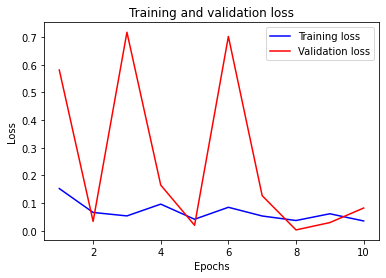

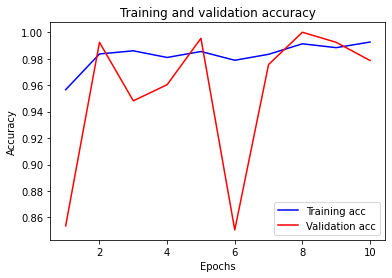

In [27]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Time for model evaluation using confusion matrix

In [28]:
test_data_generator=train_datagen.flow_from_directory('/content/DATASET/test/',
                                                  target_size=(224,224),
                                                  color_mode='rgb',
                                                  batch_size=32,
                                                  class_mode='categorical', shuffle=False)

Found 656 images belonging to 2 classes.


In [29]:
import numpy 
predictions = model.predict(test_data_generator, steps=119)
# Get most likely class
predicted_classes = numpy.argmax(predictions, axis=1)
print(predicted_classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [30]:
# from sklearn import metrics
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())   

print(true_classes)
# report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
# print(report)    

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

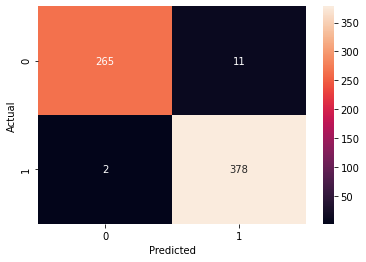

In [31]:
import seaborn as sns
import pandas as pd

cm = pd.DataFrame()

cm['Actual'] = true_classes
# cm['Predicted'] = np.round(y_predict_ANN) #Rounding the outpus to 0 or 1
cm['Predicted'] = predicted_classes
freq = pd.crosstab(cm.Actual, cm.Predicted)
sns.heatmap(freq, annot=True, fmt="d")

## Finally saving the model

In [43]:
model.save('/content/COVID_testing.h5')